# Ordinary differential equation solver

In [1]:
from scipy.integrate import odeint
import numpy as np
import pandas as pd
import plotly.express as px

In [2]:
def RSP_solver(t, P, x0):

    def RSP(x, t, P):
        r = x[0]
        Pr = P[0]
        s = x[1]
        Ps = P[1]
        p = x[2]
        Pp = P[2]

        drdt = r*(s*Pr - p*Pp)
        dsdt = s*(p*Ps - r*Pr)
        dpdt = p*(r*Pr - s*Ps)
        return [drdt, dsdt, dpdt]

    y = odeint(RSP, x0, t, args=(P,)) 
    return y

def RSP_model(t, P, x0):
    s = RSP_solver(t, P, x0)
    return s

t_start = 0
t_end = 100
t = np.linspace(t_start, t_end, t_end-t_start+1)

<Axes: >

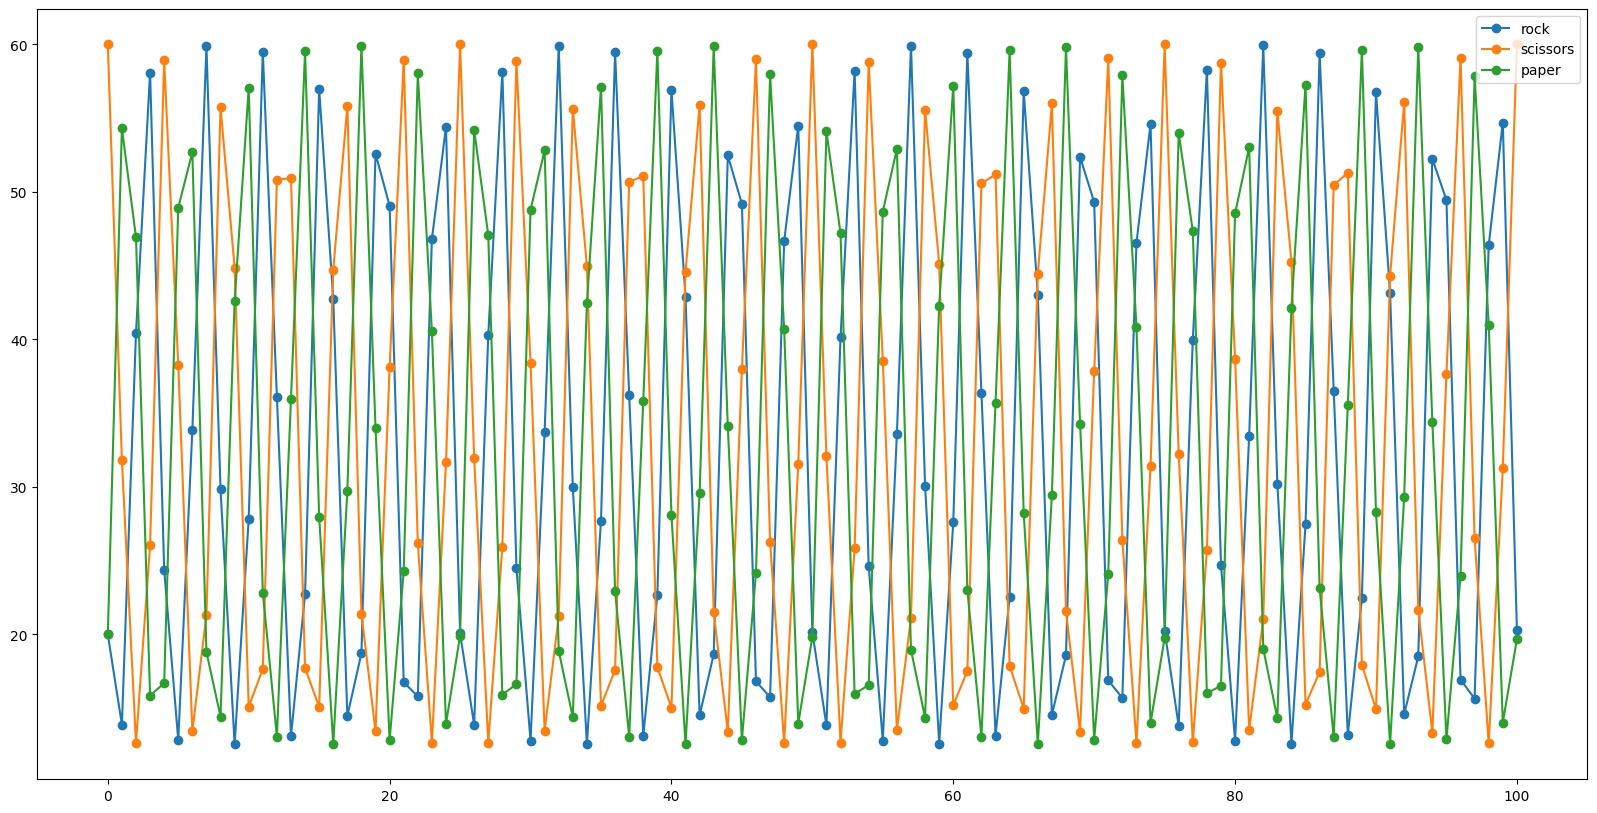

In [3]:
P = [0.33, 0.33, 0.33]
s = RSP_model(t, P, (20, 60, 20))
results_df = pd.DataFrame(s, columns=['rock', 'scissors', 'paper'])
results_df.plot(figsize=(20,10), style='-o')

In [4]:
fig = px.scatter_ternary(
    results_df[:20],
    a="rock",
    b="scissors",
    c="paper",
    color=results_df.index[:20],
    size_max=10,
    title="RSP Model"
    )
fig.update_traces(mode='lines+markers', line=dict(color='black'))
fig.update_layout(coloraxis_colorbar=dict(title='Time'))

<Axes: >

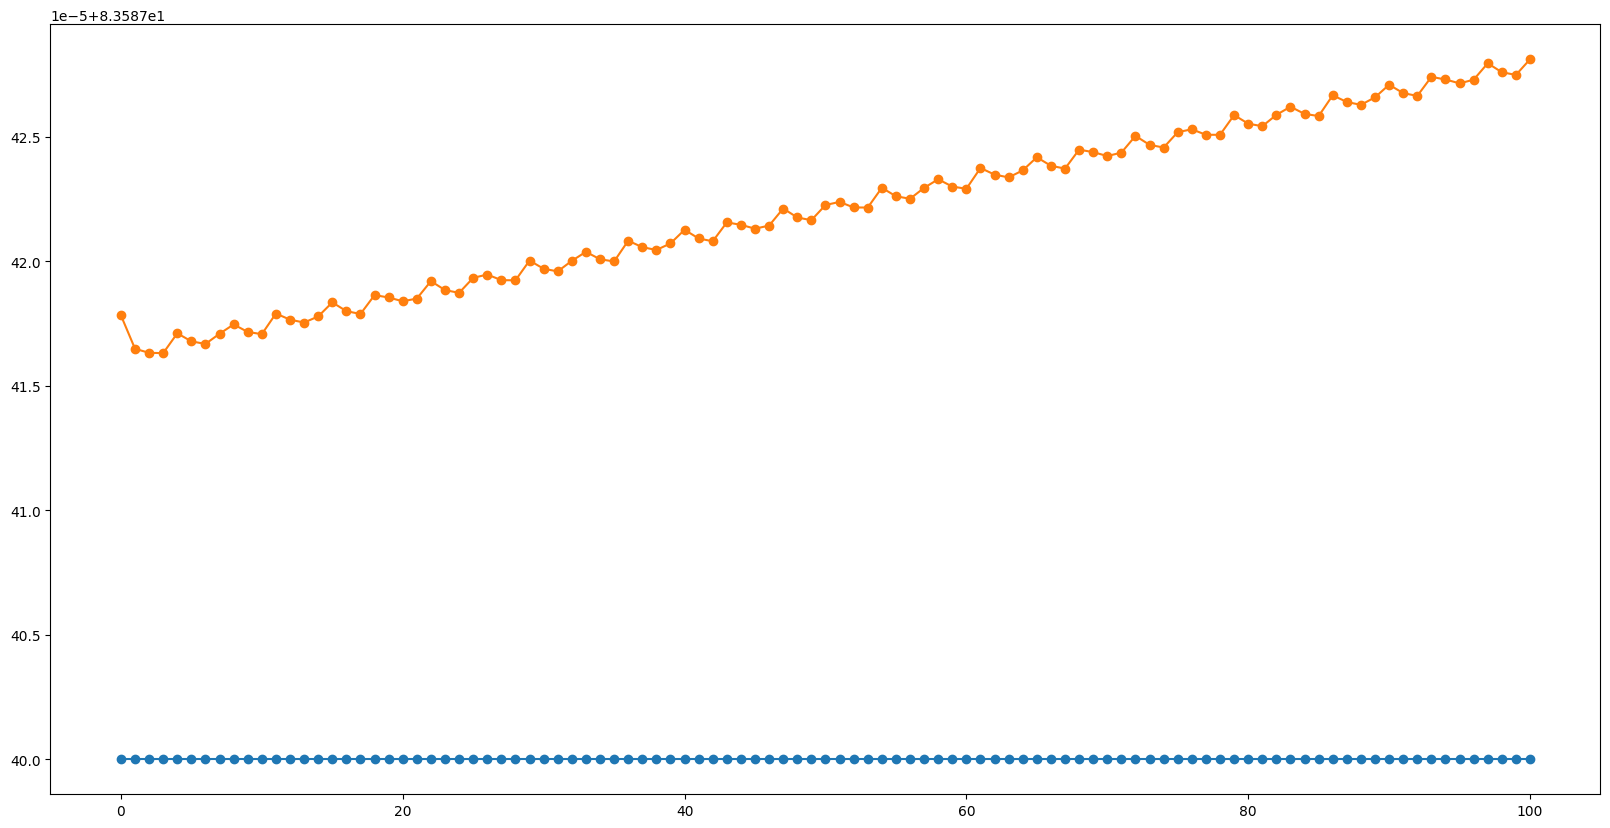

In [5]:
results_df['lambda'] = np.power(results_df['rock']/P[1], P[1])*np.power(results_df['scissors']/P[2], P[2])*np.power(results_df['paper']/P[0], P[0])
results_df['lambda'].apply(lambda x: round(x, 4)).plot(figsize=(20,10), style='-o', label='lambda, 4 digits')
results_df['lambda'].plot(figsize=(20,10), style='-o', label='lambda')

<Axes: >

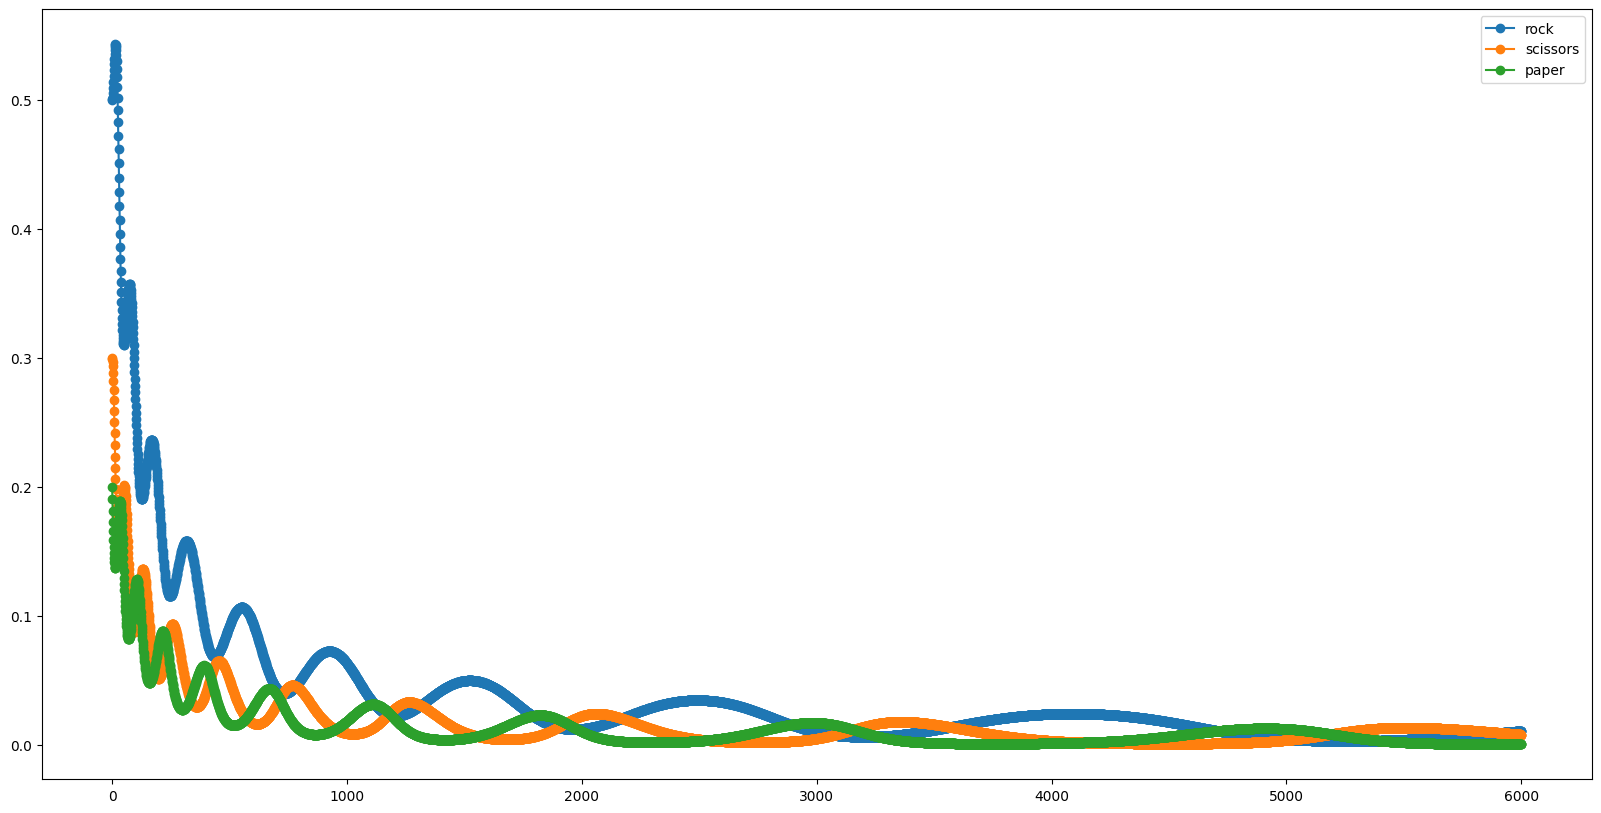

In [6]:
t_start = 0
t_end = 6000
t = np.linspace(t_start, t_end, t_end-t_start+1)
P = [0.2, 0.5, 0.3]
s = RSP_model(t, P, (0.5, 0.3, 0.2))
results_df = pd.DataFrame(s, columns=['rock', 'scissors', 'paper'])
results_df.plot(figsize=(20,10), style='-o')

In [7]:
fig = px.scatter_ternary(
    results_df,
    a="paper",
    b="rock",
    c="scissors",
    color=results_df.index,
    size_max=10,
    title="RSP Model"
    )
fig.update_traces(mode='lines+markers', line=dict(color='black'))
fig.update_layout(coloraxis_colorbar=dict(title='Time'))